# Low pass frequency filtering

**Author: Uzhva Denis Romanovich**

**Lecturer: Soloviev Igor Pavlovich**

## Ideal, Butterworth and Gaussian filter
### Theory

Low pass filtering is applied to reduce sharp transitions on images with the purpose to blur them.
Three of such filters are proposed: ideal, Butterworth and Gaussian, as shown below
$$
\begin{equation}
    \begin{gathered}
        H(u, v) = 
        \begin{cases}
            1, \textrm{at } D(u, v) \leq D_0 \\
            0, \textrm{else};
        \end{cases} \\
        H(u, v) = \frac{1}{1 + (D(u, v) / D_0)^{2n}}; \\
        H(u, v) = \exp (-D^2(u, v) / 2 D_0);
    \end{gathered}
\end{equation}
$$
where $D(u, v)$ is the distance from a center of an image and $D_0$ is a constant.

### Code

#### Fast fourier transform

In [1]:
import numpy as np


def get_fft(img, shift=False):
    h = img.shape[0]
    w = img.shape[1]
    img = img.astype(np.complex)
    
    x_arr = np.arange(h)
    y_arr = np.arange(w)
    
    x_mat = np.repeat(x_arr.reshape((h, 1)), w, 1)
    y_mat = np.repeat(y_arr.reshape((1, w)), h, 0)
    
    if shift:
        exp_val = (x_mat + y_mat) * np.pi * 1j
        img = np.multiply(img, np.exp(exp_val))
        
    if len(img.shape) == 3:
        img = np.swapaxes(img, 0, 2)
        img_fft = np.fft.fft2(img)
    else:
        img_fft = np.fft.fft2(img)
        
    return img_fft

#### Inverse FFT

In [2]:
import numpy as np


def get_ifft(img_fft, shift=False):
    h = img_fft.shape[0]
    w = img_fft.shape[1]
    img_fft = img_fft.astype(np.complex)
    
    u_arr = np.arange(h)
    v_arr = np.arange(w)
    
    u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
    v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)
     
    if shift:
        exp_val = (u_mat + v_mat) * np.pi * 1j
        img_fft = np.multiply(img_fft, np.exp(exp_val))
        
    if len(img_fft.shape) == 3:
        img_fft = np.swapaxes(img_fft, 0, 2)
        img_ifft = np.fft.ifft2(img_fft)
    else:
        img_ifft = np.fft.ifft2(img_fft)
        
    return img_ifft

#### Ideal low pass filter

In [3]:
import numpy as np


def apply_ideal_LP(img_fft, d0perc=.5):
    h = img_fft.shape[0]
    w = img_fft.shape[1]
    
    d0 = d0perc * np.min([h, w]) / 2
    
    u_arr = np.arange(h)
    v_arr = np.arange(w)
    
    u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
    v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)
    
    dist_mat = np.sqrt(np.power((u_mat - h//2), 2) + np.power((v_mat - w//2), 2))
    
    filter_mat = np.zeros_like(dist_mat)
    filter_mat[dist_mat <= d0] = 1.
    
    if len(img_fft.shape) == 3:
        channels = img_fft.shape[-1]
        for ch in range(channels):
            img_fft[:, :, ch] = np.multiply(img_fft[:, :, ch], filter_mat)
    else:
        img_fft = np.multiply(img_fft, filter_mat)
        
    return img_fft

#### Butterworth filter

In [4]:
    import numpy as np


    def apply_bw_LP(img_fft, d0perc=.5, n=1):
        h = img_fft.shape[0]
        w = img_fft.shape[1]

        d0 = d0perc * np.min([h, w]) / 2

        u_arr = np.arange(h)
        v_arr = np.arange(w)

        u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
        v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)

        dist_mat = np.sqrt(np.power((u_mat - h//2), 2) + np.power((v_mat - w//2), 2))

        filter_mat = 1 / (1 + np.power((dist_mat / d0), 2*n))

        if len(img_fft.shape) == 3:
            channels = img_fft.shape[-1]
            for ch in range(channels):
                img_fft[:, :, ch] = np.multiply(img_fft[:, :, ch], filter_mat)
        else:
            img_fft = np.multiply(img_fft, filter_mat)

        return img_fft

#### Gaussian filter

In [5]:
import numpy as np


def apply_gauss_LP(img_fft, d0perc=.5):
    h = img_fft.shape[0]
    w = img_fft.shape[1]
    
    d0 = d0perc * np.min([h, w]) / 2
    
    u_arr = np.arange(h)
    v_arr = np.arange(w)
    
    u_mat = np.repeat(u_arr.reshape((h, 1)), w, 1)
    v_mat = np.repeat(v_arr.reshape((1, w)), h, 0)
    
    dist_mat = np.sqrt(np.power((u_mat - h//2), 2) + np.power((v_mat - w//2), 2))
    
    filter_mat = np.exp(-np.power(dist_mat, 2) / (2 * d0 * d0))
    
    if len(img_fft.shape) == 3:
        channels = img_fft.shape[-1]
        for ch in range(channels):
            img_fft[:, :, ch] = np.multiply(img_fft[:, :, ch], filter_mat)
    else:
        img_fft = np.multiply(img_fft, filter_mat)
        
    return img_fft

### Results

#### Processing + visualization

First of all, we need to load images for the further processing.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


img_1 = Image.open('./degtext.png')
img_2 = Image.open('./brain.jpeg')

In [7]:
# represent the images as tensors
np_1 = np.array(img_1)
np_2 = np.array(img_2)
print('Picture dimensions:')
print(np_1.shape)
print(np_2.shape)

Picture dimensions:
(256, 256, 3)
(512, 512, 3)


In [8]:
# simplify the images by summing the channels
np_1_sum = np.sum(np_1, axis=2) // 3
np_2_sum = np.sum(np_2, axis=2) // 3

Apply FFT to the images:

In [9]:
np_1_fft = get_fft(np_1_sum, True)

In [10]:
np_2_fft = get_fft(np_2_sum, True)

In [11]:
# log of abs

np_1_fft_logabs = np.log(np.abs(np_1_fft)+1)
np_2_fft_logabs = np.log(np.abs(np_2_fft)+1)

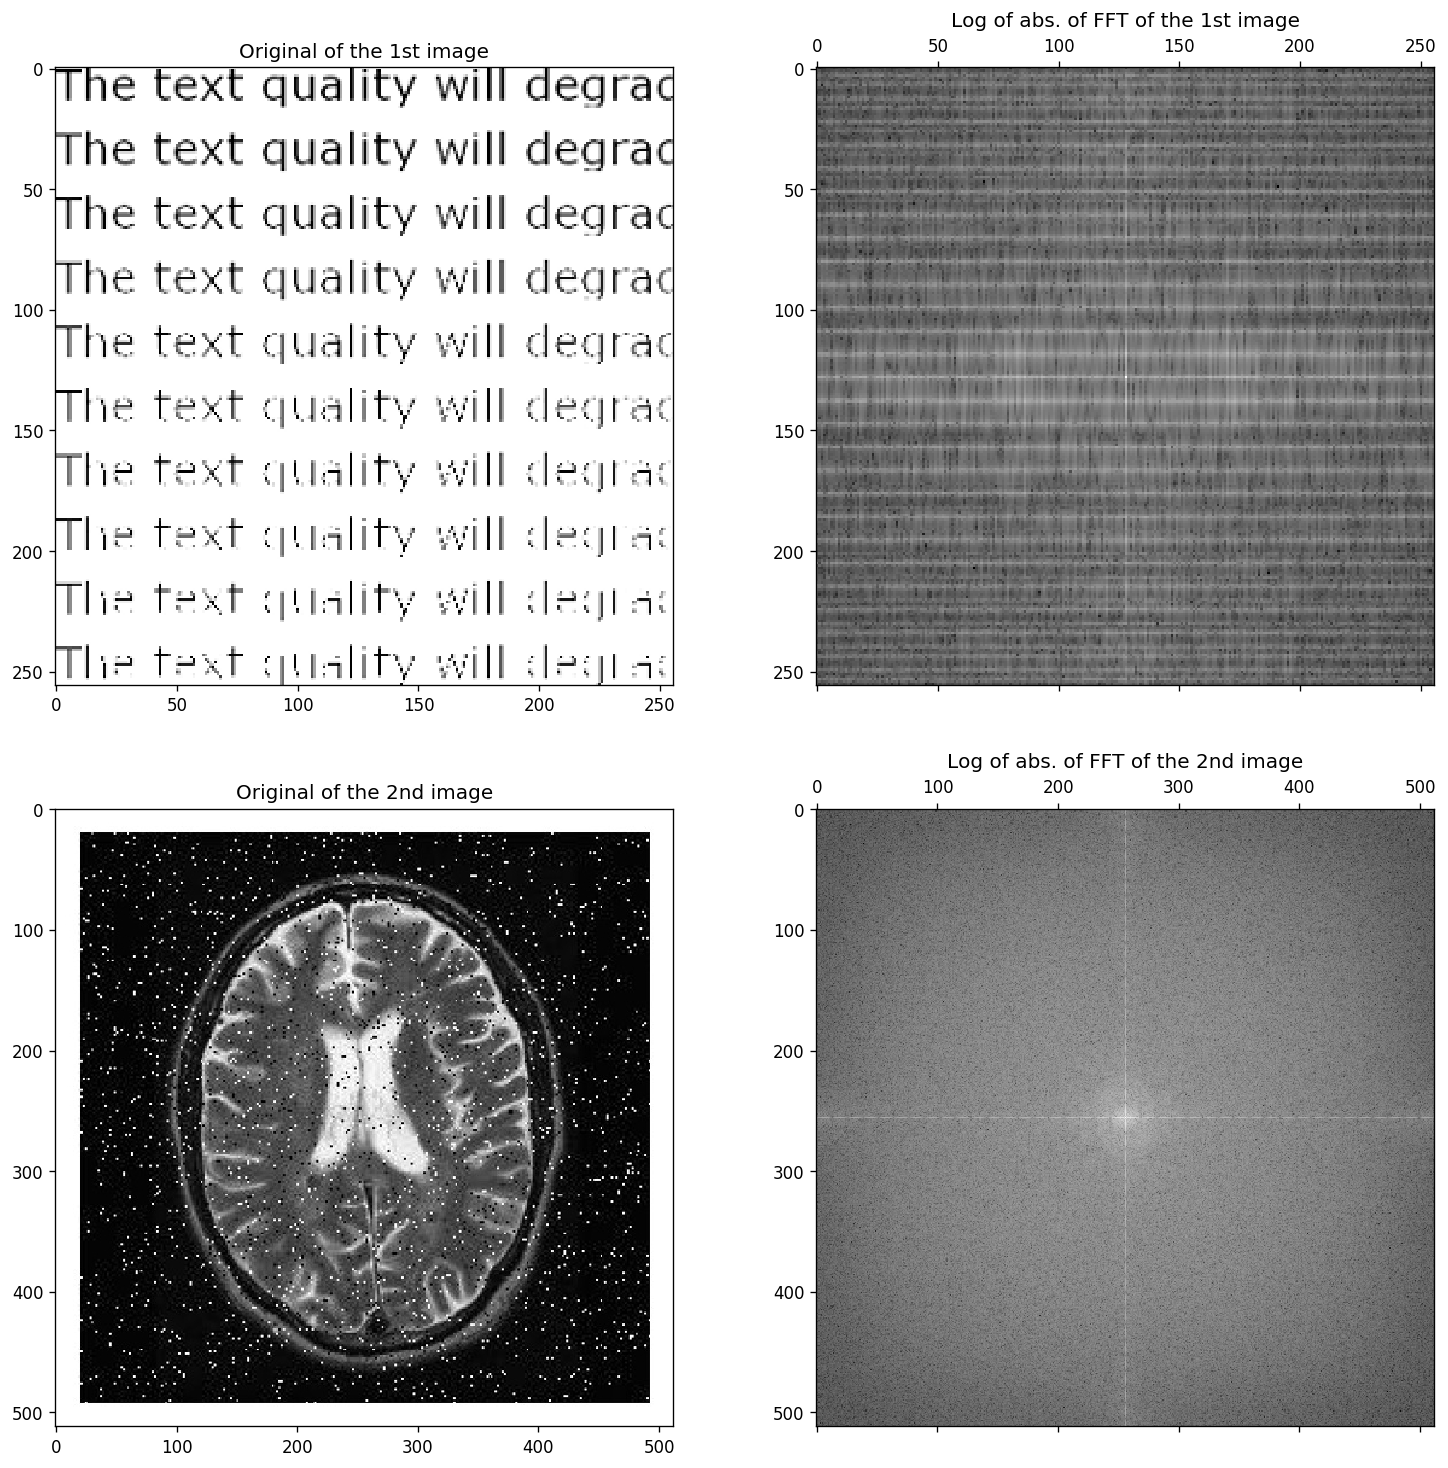

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].matshow(np_1_fft_logabs, cmap='gray')
axs[0, 1].set_title('Log of abs. of FFT of the 1st image')
axs[1, 0].imshow(np_2_sum, cmap='gray')
axs[1, 0].set_title('Original of the 2nd image')
axs[1, 1].matshow(np_2_fft_logabs, cmap='gray')
axs[1, 1].set_title('Log of abs. of FFT of the 2nd image')
plt.show()

Apply the ideal filter with various $D_0$ (which we define as a percentage of image's height).

In [13]:
np_1_id01 = apply_ideal_LP(np_1_fft, .1)
np_1_id05 = apply_ideal_LP(np_1_fft, .5)
np_1_id08 = apply_ideal_LP(np_1_fft, .8)

np_1_id01i = np.abs(get_ifft(np_1_id01))
np_1_id05i = np.abs(get_ifft(np_1_id05))
np_1_id08i = np.abs(get_ifft(np_1_id08))

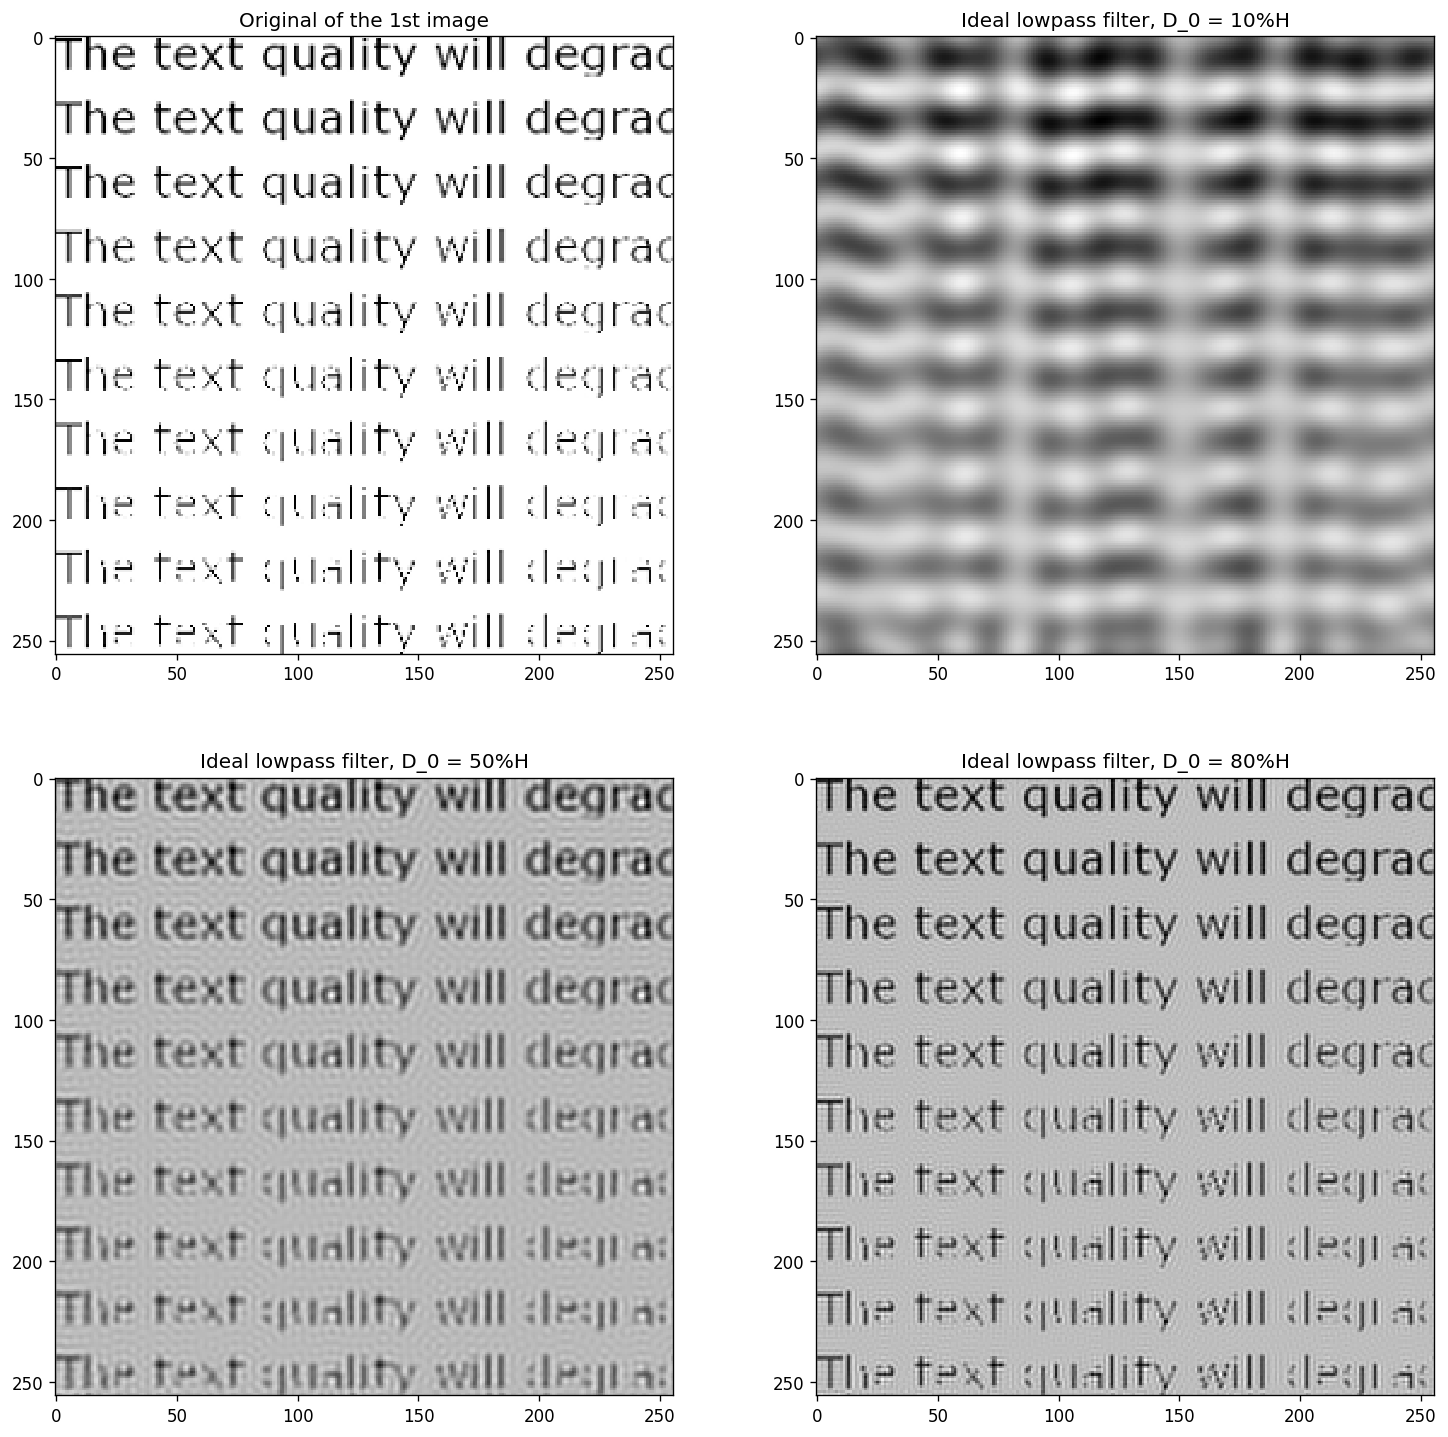

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_id01i, cmap='gray')
axs[0, 1].set_title('Ideal lowpass filter, D_0 = 10%H')
axs[1, 0].imshow(np_1_id05i, cmap='gray')
axs[1, 0].set_title('Ideal lowpass filter, D_0 = 50%H')
axs[1, 1].imshow(np_1_id08i, cmap='gray')
axs[1, 1].set_title('Ideal lowpass filter, D_0 = 80%H')
plt.show()

The best improvements can be seen at $D_0 \sim 50\%$ up to the 6th string.

Apply the Butterworth filter with various $D_0$ and $n$.

In [15]:
## order 2

np_1_bw01_2 = apply_bw_LP(np_1_fft, .1, 2)
np_1_bw05_2 = apply_bw_LP(np_1_fft, .5, 2)
np_1_bw08_2 = apply_bw_LP(np_1_fft, .8, 2)

np_1_bw01i_2 = np.abs(get_ifft(np_1_bw01_2))
np_1_bw05i_2 = np.abs(get_ifft(np_1_bw05_2))
np_1_bw08i_2 = np.abs(get_ifft(np_1_bw08_2))

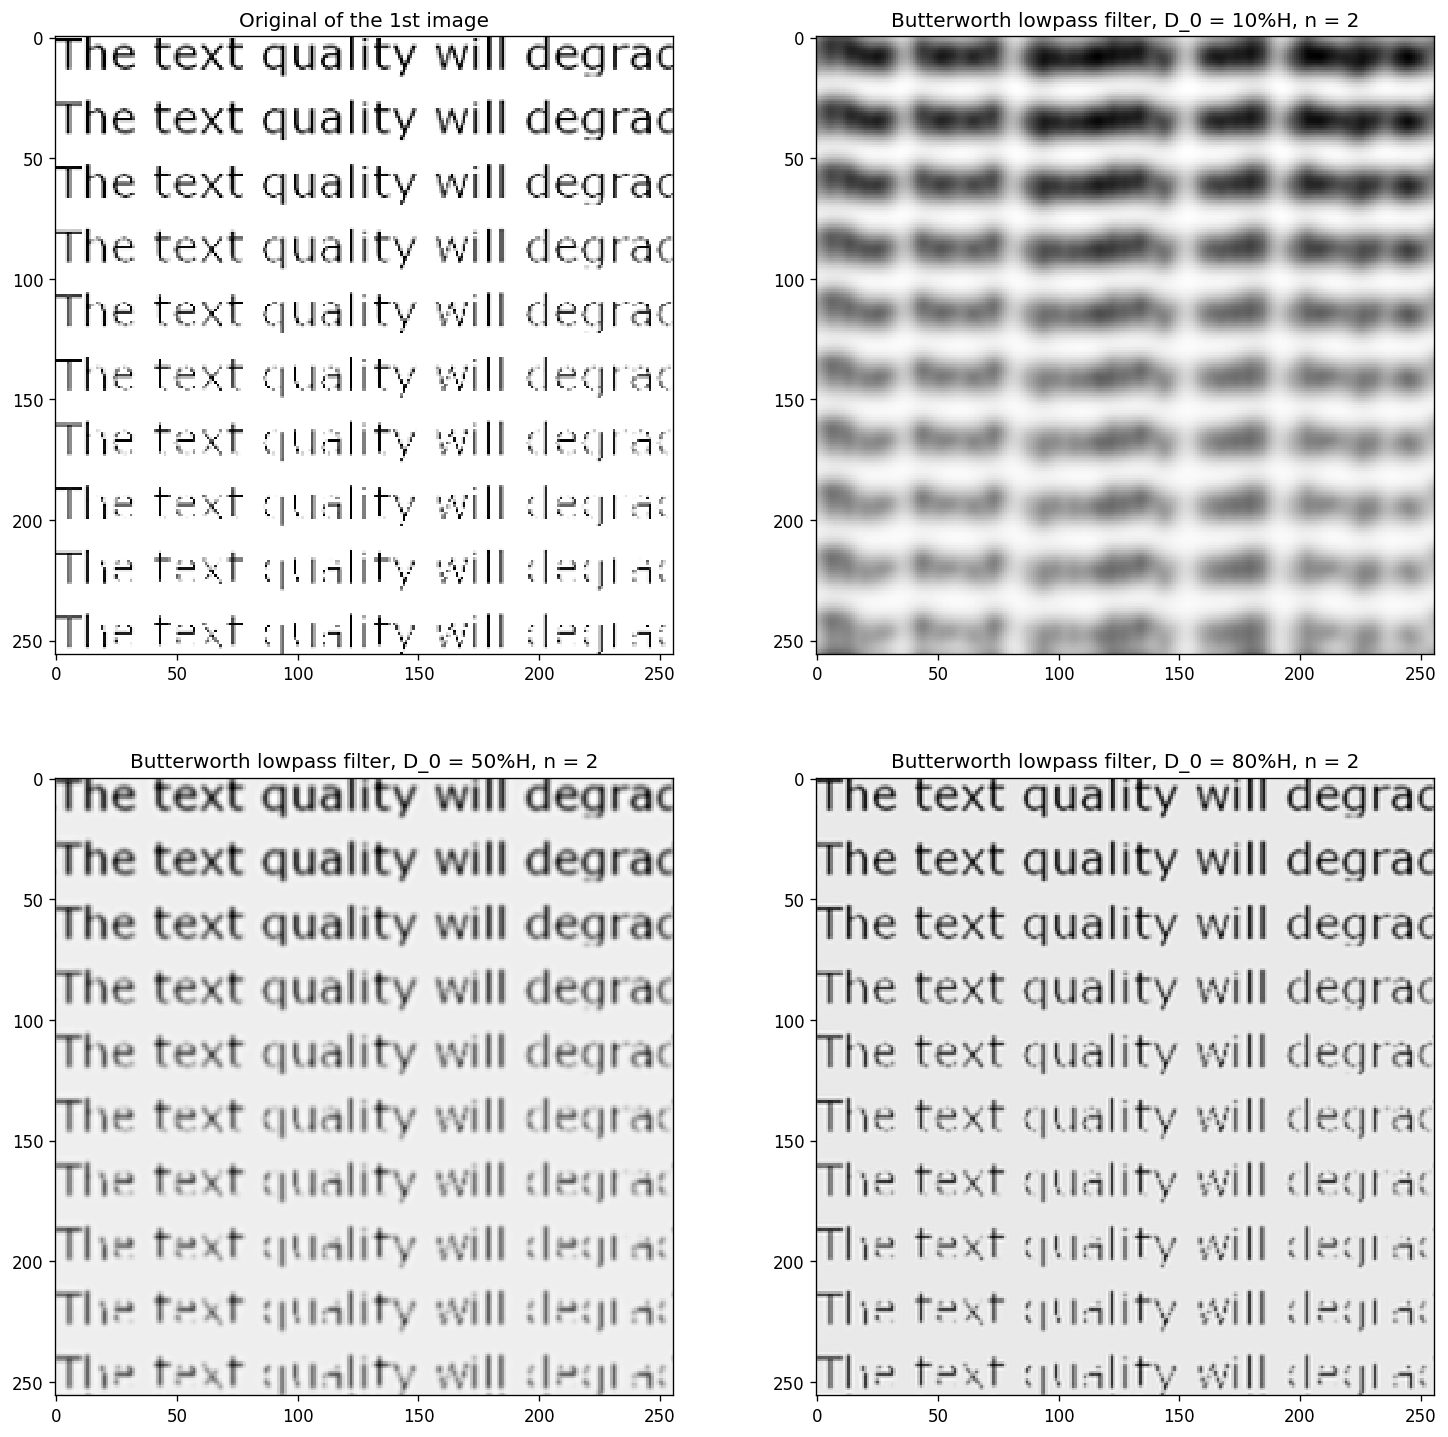

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_bw01i_2, cmap='gray')
axs[0, 1].set_title('Butterworth lowpass filter, D_0 = 10%H, n = 2')
axs[1, 0].imshow(np_1_bw05i_2, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 2')
axs[1, 1].imshow(np_1_bw08i_2, cmap='gray')
axs[1, 1].set_title('Butterworth lowpass filter, D_0 = 80%H, n = 2')
plt.show()

In [17]:
## order 4

np_1_bw01_4 = apply_bw_LP(np_1_fft, .1, 4)
np_1_bw05_4 = apply_bw_LP(np_1_fft, .5, 4)
np_1_bw08_4 = apply_bw_LP(np_1_fft, .8, 4)

np_1_bw01i_4 = np.abs(get_ifft(np_1_bw01_4))
np_1_bw05i_4 = np.abs(get_ifft(np_1_bw05_4))
np_1_bw08i_4 = np.abs(get_ifft(np_1_bw08_4))

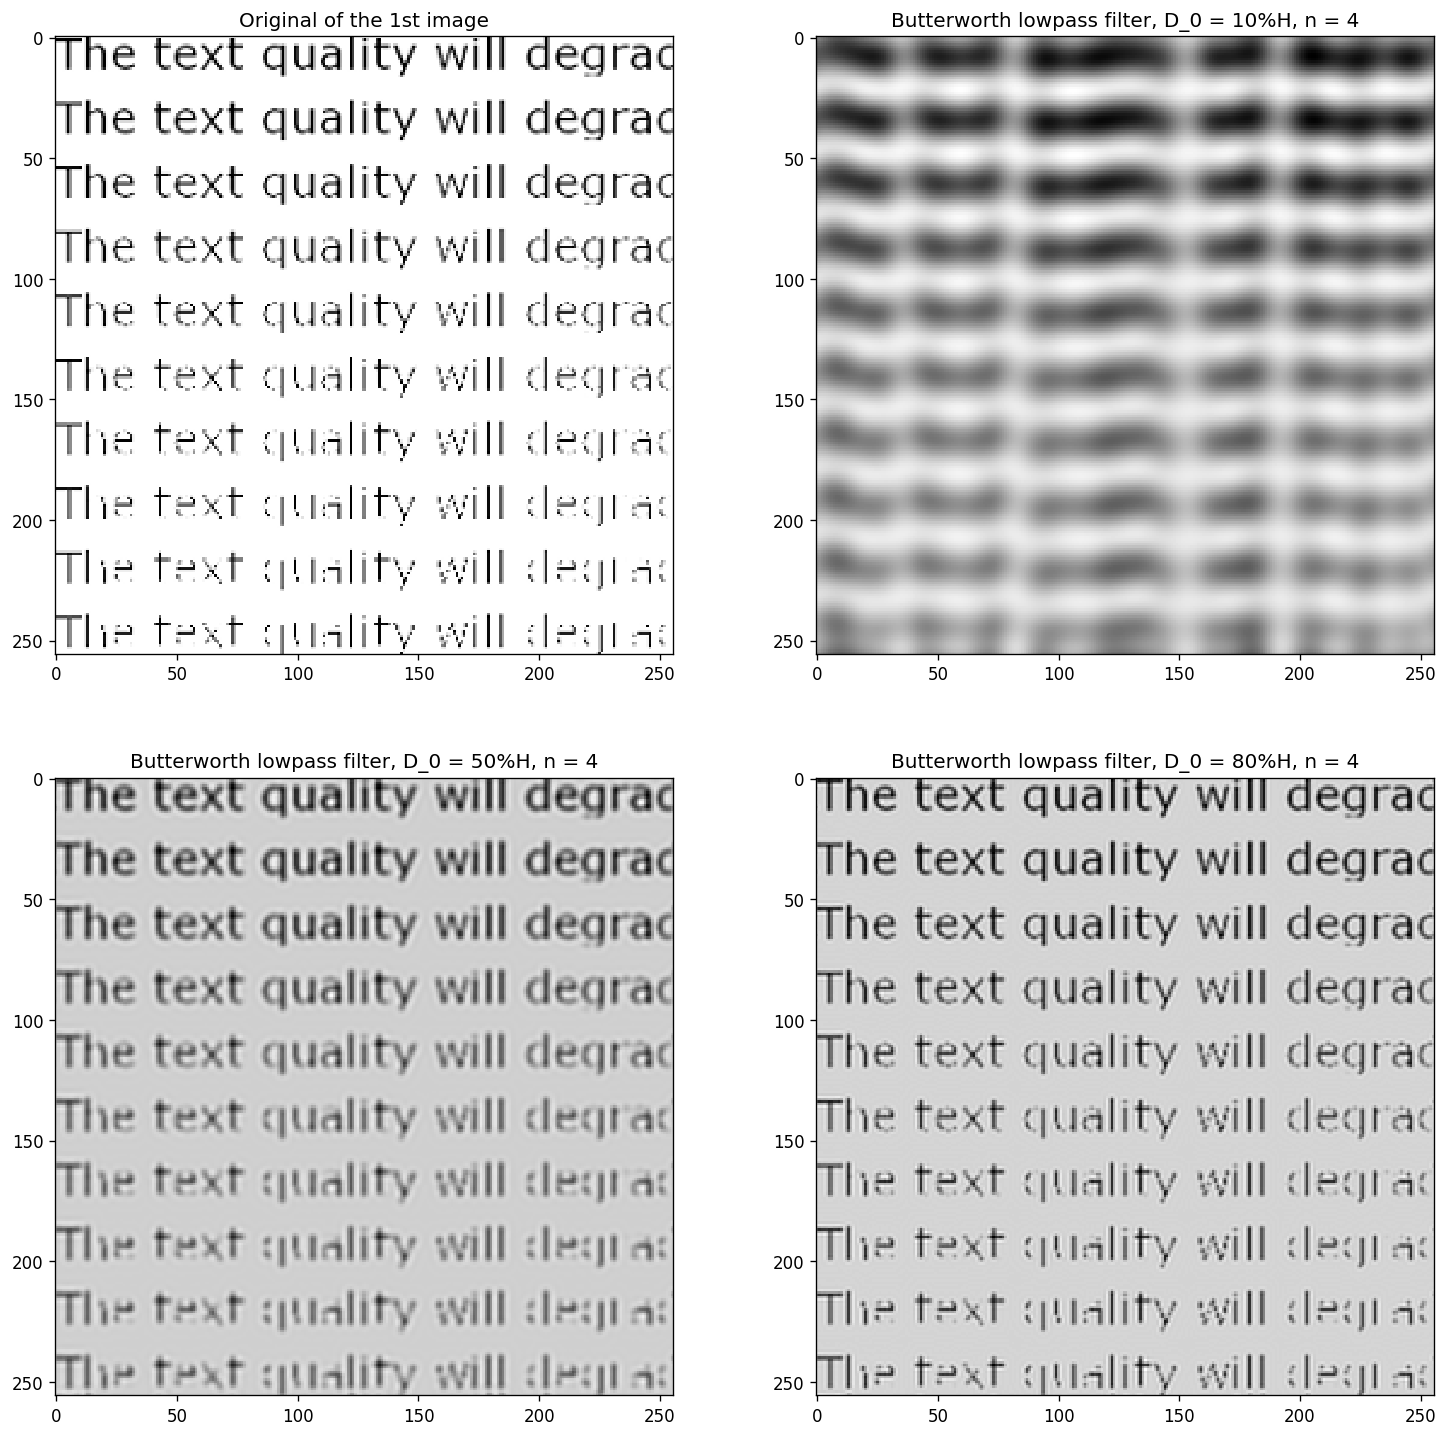

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_bw01i_4, cmap='gray')
axs[0, 1].set_title('Butterworth lowpass filter, D_0 = 10%H, n = 4')
axs[1, 0].imshow(np_1_bw05i_4, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 4')
axs[1, 1].imshow(np_1_bw08i_4, cmap='gray')
axs[1, 1].set_title('Butterworth lowpass filter, D_0 = 80%H, n = 4')
plt.show()

Compare two best results of Butterworth filtering: 

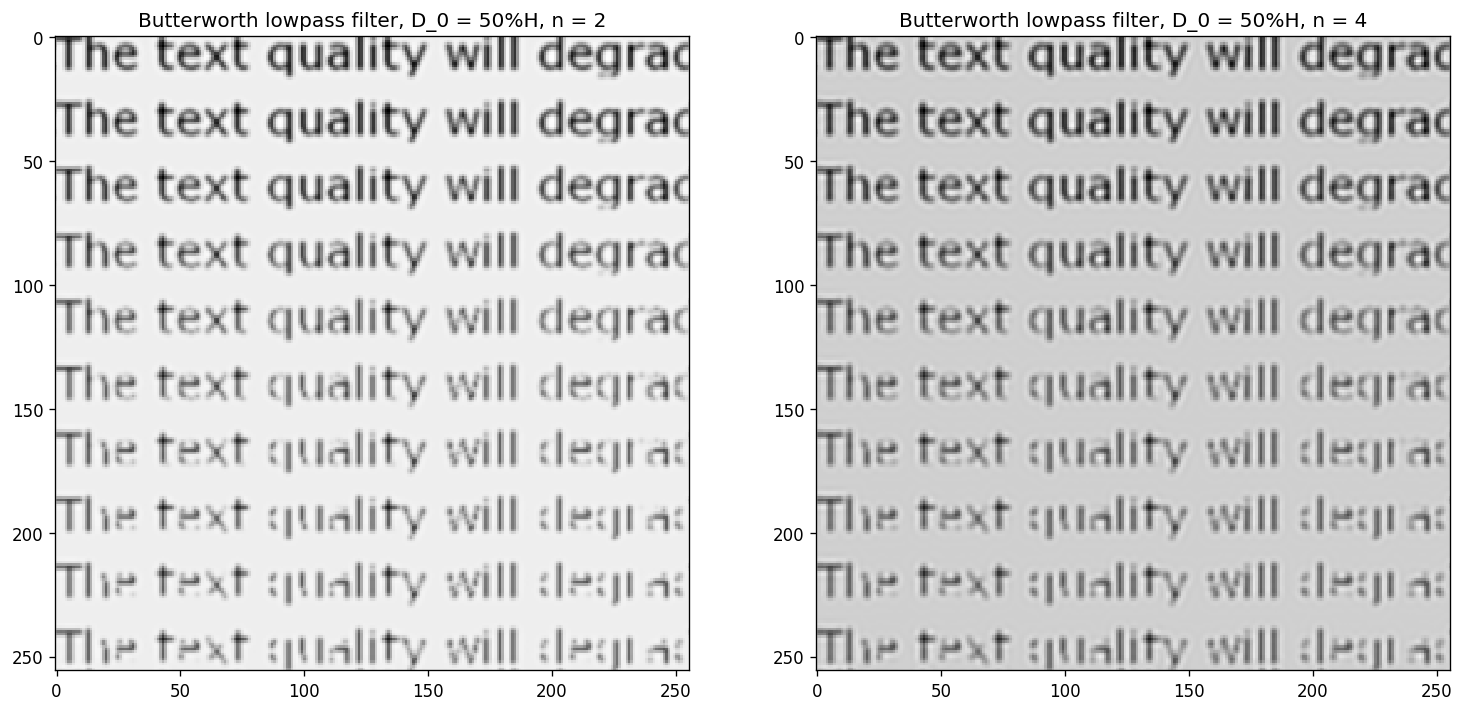

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15), dpi=120)
axs[0].imshow(np_1_bw05i_2, cmap='gray')
axs[0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 2')
axs[1].imshow(np_1_bw05i_4, cmap='gray')
axs[1].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 4')
plt.show()

The results are very similar. However, the text is slightly more readable at $n = 4$.

Apply the ideal filter with various $D_0$.

In [20]:
np_1_gs01 = apply_gauss_LP(np_1_fft, .1)
np_1_gs05 = apply_gauss_LP(np_1_fft, .5)
np_1_gs08 = apply_gauss_LP(np_1_fft, .8)

np_1_gs01i = np.abs(get_ifft(np_1_gs01))
np_1_gs05i = np.abs(get_ifft(np_1_gs05))
np_1_gs08i = np.abs(get_ifft(np_1_gs08))

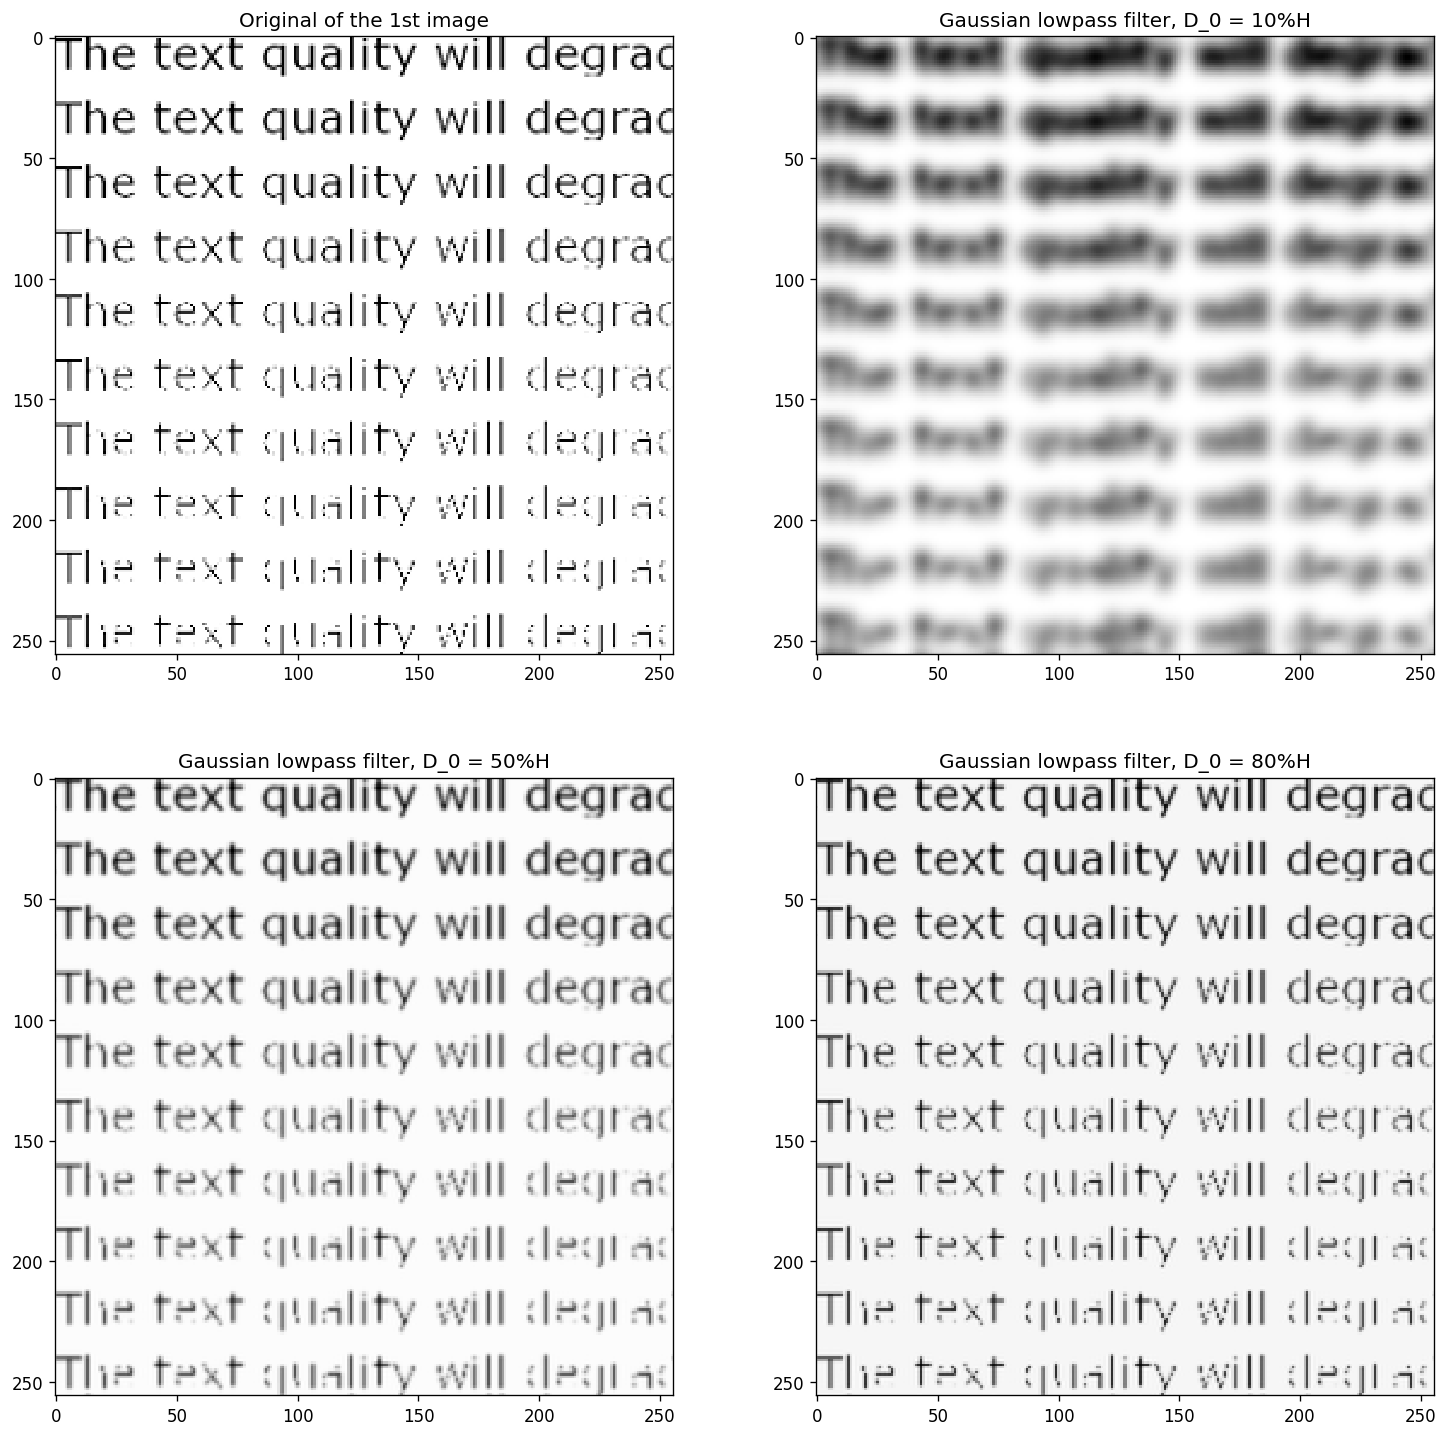

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_gs01i, cmap='gray')
axs[0, 1].set_title('Gaussian lowpass filter, D_0 = 10%H')
axs[1, 0].imshow(np_1_gs05i, cmap='gray')
axs[1, 0].set_title('Gaussian lowpass filter, D_0 = 50%H')
axs[1, 1].imshow(np_1_gs08i, cmap='gray')
axs[1, 1].set_title('Gaussian lowpass filter, D_0 = 80%H')
plt.show()

Again, the best result is at $D_0 \sim 50\%$.

Let's compare the three best results:

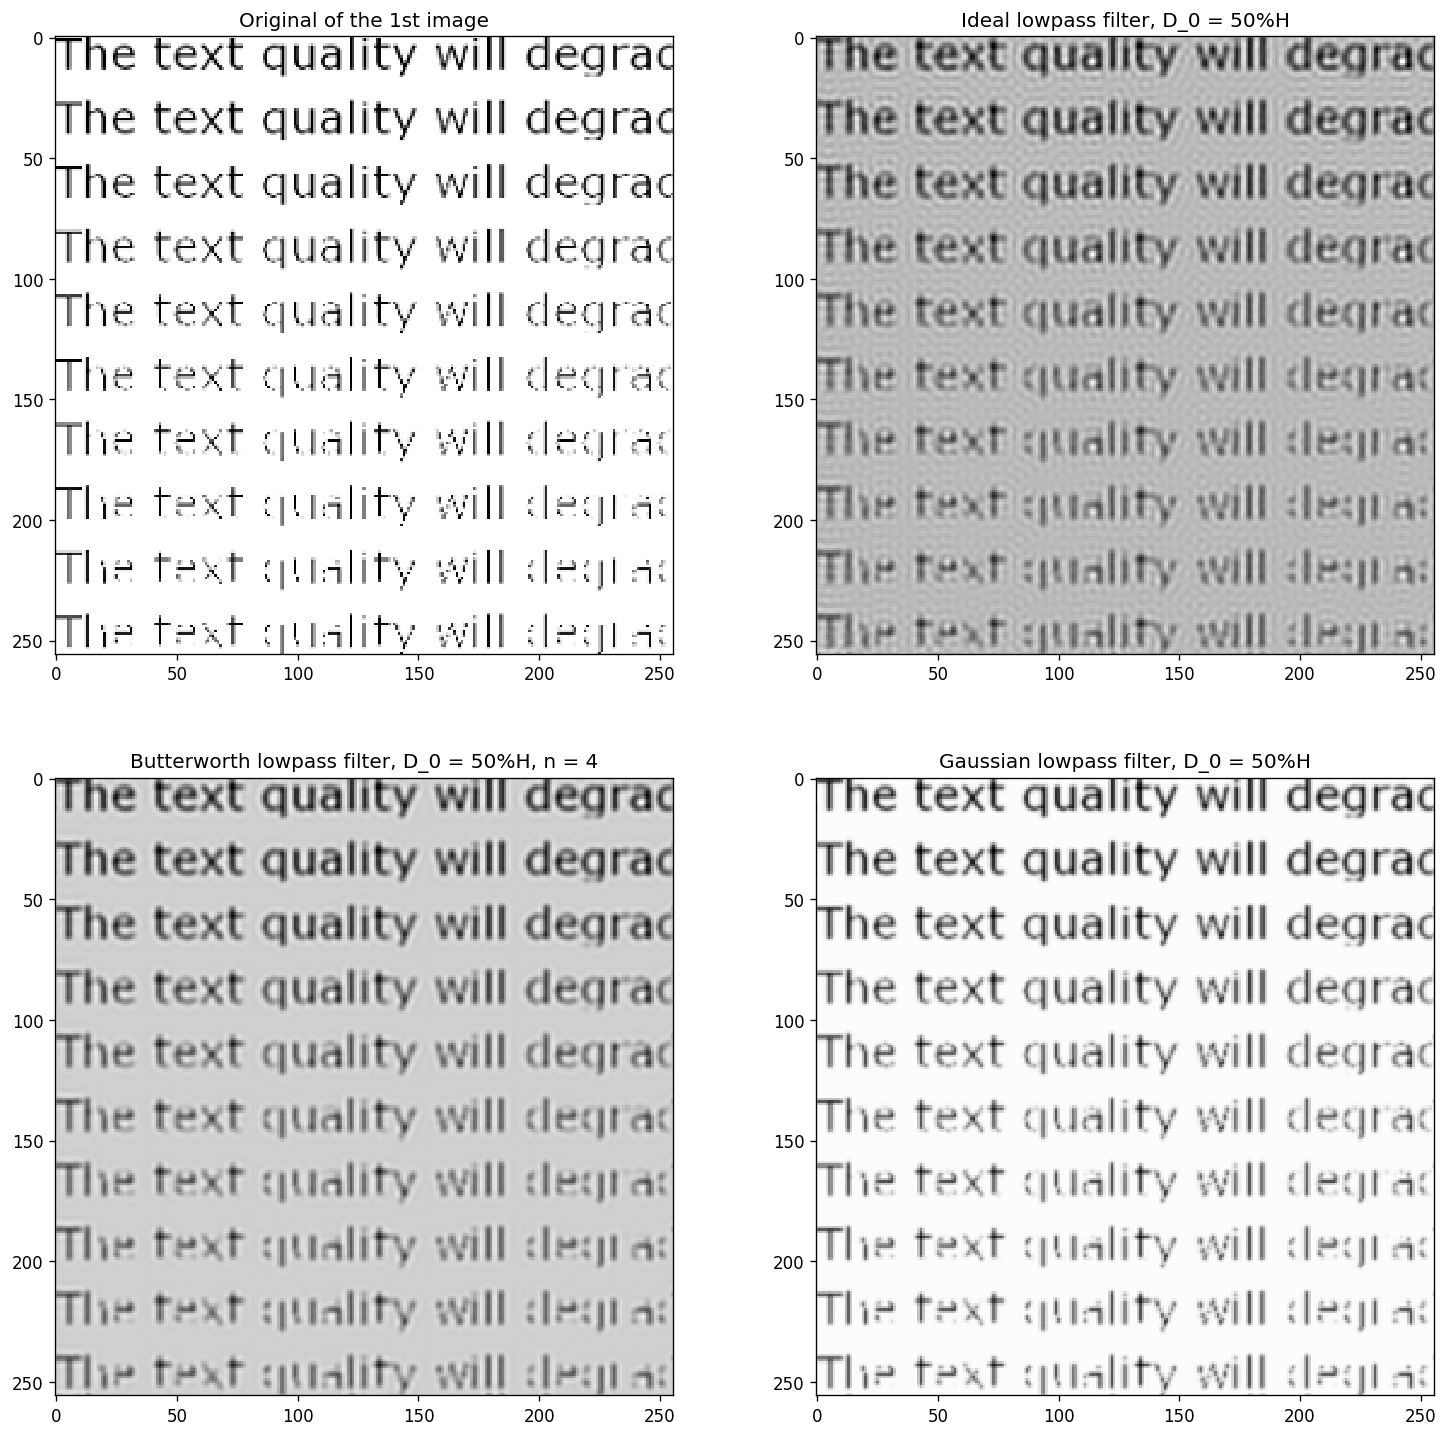

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_1_sum, cmap='gray')
axs[0, 0].set_title('Original of the 1st image')
axs[0, 1].imshow(np_1_id05i, cmap='gray')
axs[0, 1].set_title('Ideal lowpass filter, D_0 = 50%H')
axs[1, 0].imshow(np_1_bw05i_4, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 50%H, n = 4')
axs[1, 1].imshow(np_1_gs05i, cmap='gray')
axs[1, 1].set_title('Gaussian lowpass filter, D_0 = 50%H')
plt.show()

The gaussian filter allows to reduce the amount of artifacts.
However, the ideal filter made the best result in readability.

Let's now process the 2nd image.

In [23]:
np_2_id03 = apply_ideal_LP(np_2_fft, .3)
np_2_bw03 = apply_bw_LP(np_2_fft, .3, 4)
np_2_gs03 = apply_gauss_LP(np_2_fft, .3)

np_2_id03i = np.abs(get_ifft(np_2_id03))
np_2_bw03i = np.abs(get_ifft(np_2_bw03))
np_2_gs03i = np.abs(get_ifft(np_2_gs03))

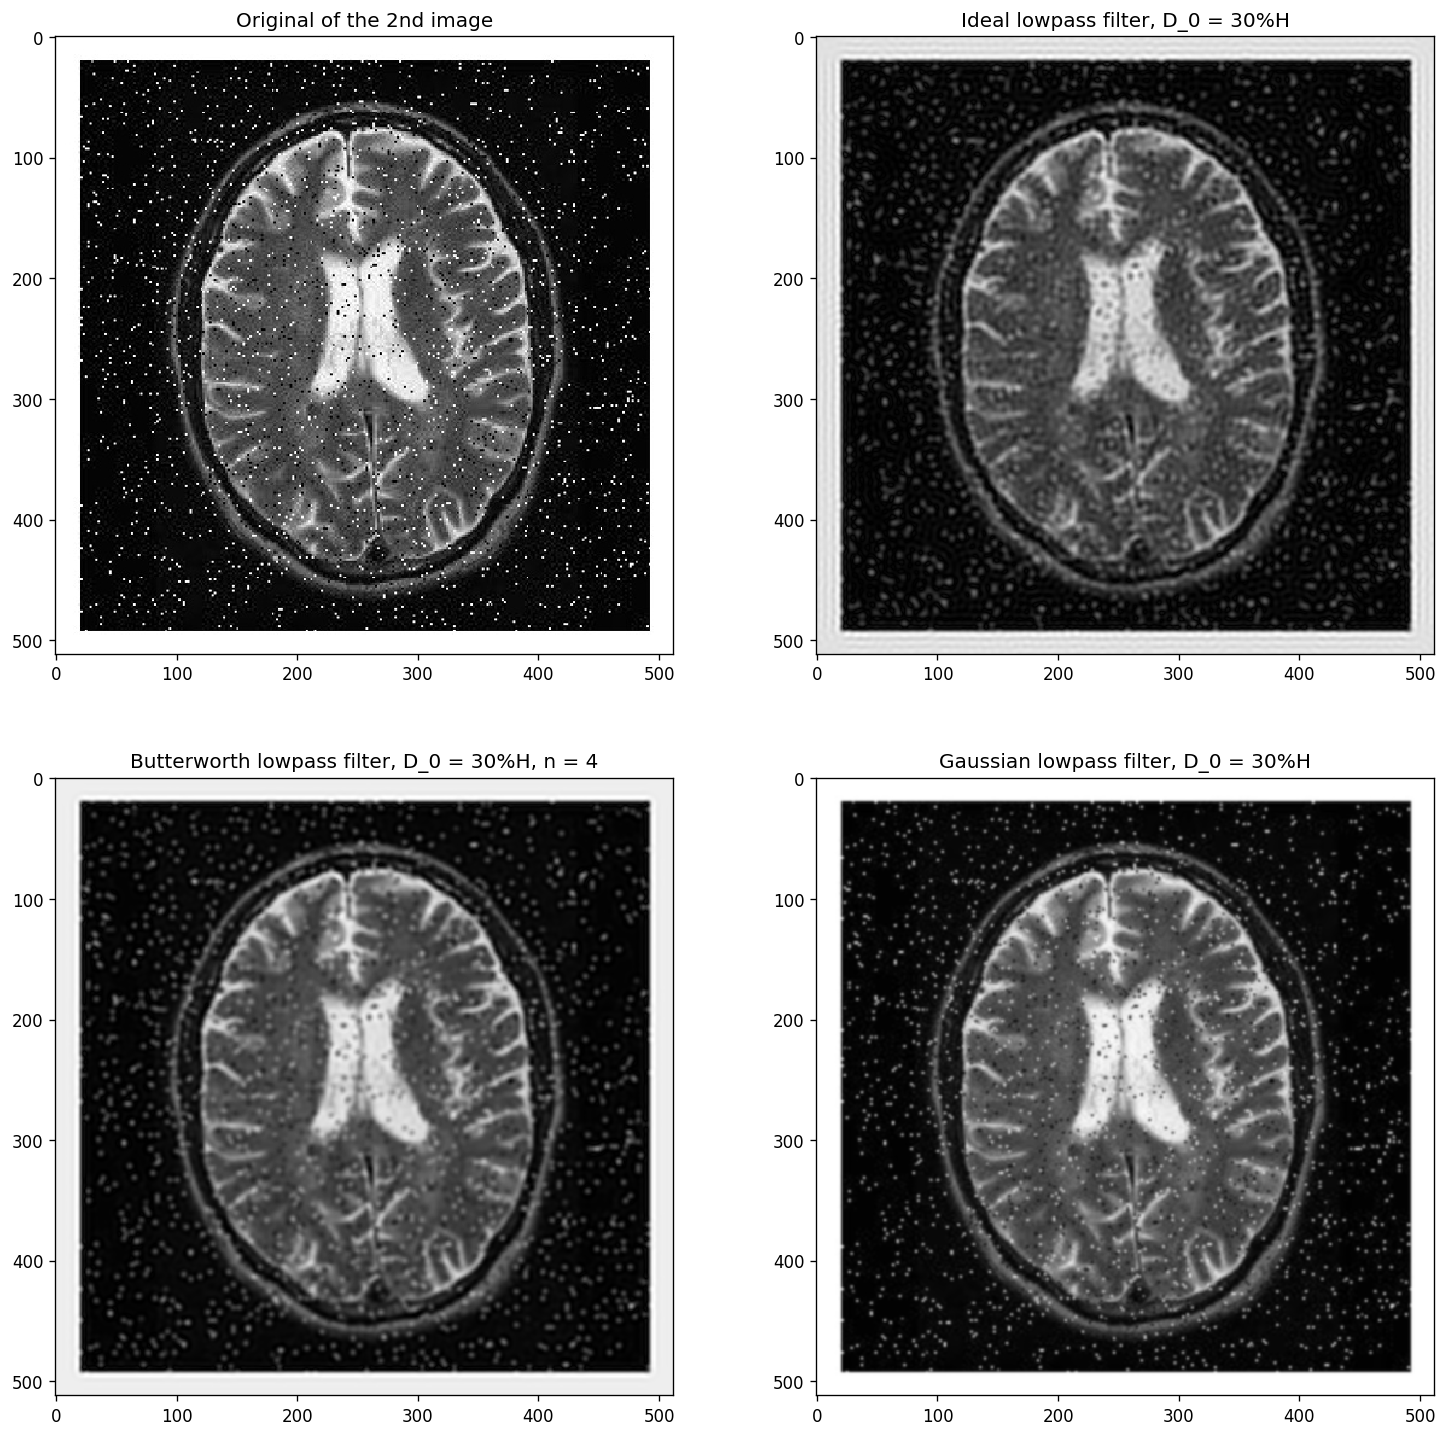

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(np_2_sum, cmap='gray')
axs[0, 0].set_title('Original of the 2nd image')
axs[0, 1].imshow(np_2_id03i, cmap='gray')
axs[0, 1].set_title('Ideal lowpass filter, D_0 = 30%H')
axs[1, 0].imshow(np_2_bw03i, cmap='gray')
axs[1, 0].set_title('Butterworth lowpass filter, D_0 = 30%H, n = 4')
axs[1, 1].imshow(np_2_gs03i, cmap='gray')
axs[1, 1].set_title('Gaussian lowpass filter, D_0 = 30%H')
plt.show()

Again, the ideal filter is best for reducing the amount of "salt". Hovewer, the gaussian filter allows to keep more details.